# data preprocessing 

In [65]:
import pandas as ps
data=ps.read_csv("titanic-passengers.csv",sep=";")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [67]:
data.isnull().sum().sum()

866

In [68]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
print(data["Age"].mean())

29.69911764705882


In [70]:
data["Age"].fillna(data["Age"].mean(),inplace=True)
data["Age"].isnull().sum()

0

In [71]:
data["Cabin"].value_counts().max

<bound method NDFrame._add_numeric_operations.<locals>.max of C23 C25 C27    4
B96 B98        4
G6             4
C22 C26        3
E101           3
              ..
B50            1
D28            1
B101           1
A14            1
C110           1
Name: Cabin, Length: 147, dtype: int64>

In [72]:
data["Cabin"].fillna("G6",inplace=True)
data.tail()
data["Cabin"].value_counts()

G6             691
C23 C25 C27      4
B96 B98          4
C22 C26          3
E101             3
              ... 
B50              1
D28              1
B101             1
A14              1
C110             1
Name: Cabin, Length: 147, dtype: int64

In [73]:
data["Cabin"].isnull().sum()

0

In [74]:
data["Embarked"].isnull().sum()

2

In [75]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [76]:
data["Embarked"].fillna("S",inplace=True)
data["Embarked"].isnull().sum()

0

In [77]:
data.isnull().sum().sum()

0

In [78]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


# data visualization

<AxesSubplot:>

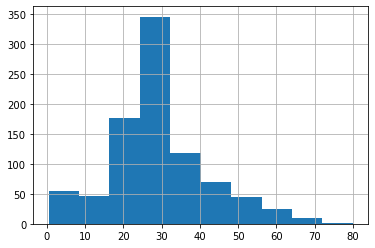

In [79]:
data["Age"].hist()

<AxesSubplot:title={'center':'Sex distribution'}, xlabel='Sex', ylabel='Distribution'>

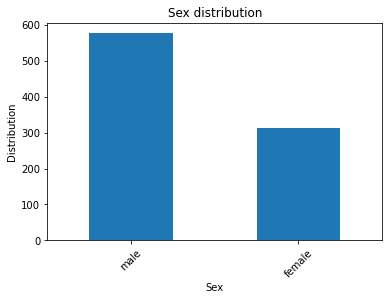

In [80]:
import matplotlib.pyplot as plt
plt.xlabel("Sex")
plt.ylabel("Distribution")
plt.title("Sex distribution")
vc=data["Sex"].value_counts()
vc.plot.bar(rot=45)

<AxesSubplot:title={'center':'Pclass'}, xlabel='Class', ylabel='Distribution'>

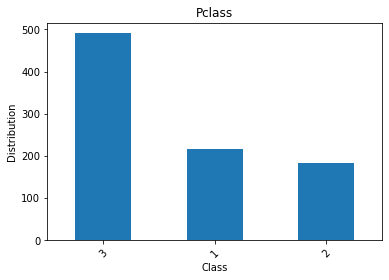

In [81]:
plt.xlabel("Class")
plt.ylabel("Distribution")
plt.title("Pclass")
vc=data["Pclass"].value_counts()
vc.plot.bar(rot=45)

<AxesSubplot:title={'center':'survived'}, xlabel='survived', ylabel='Distribution'>

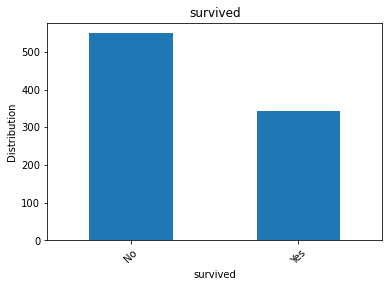

In [82]:
plt.xlabel("survived")
plt.ylabel("Distribution")
plt.title("survived")
vc=data["Survived"].value_counts()
vc.plot.bar(rot=45)

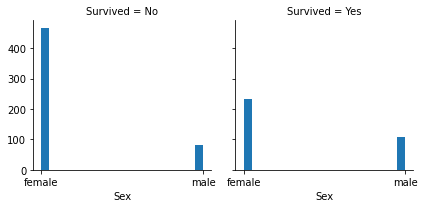

In [83]:
#Sex
import seaborn as sns
g=sns.FacetGrid(data,col="Survived")
g.map(plt.hist,"Sex",bins=20)

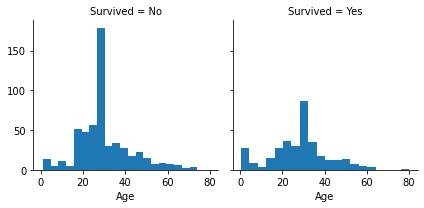

In [84]:
#Age
g=sns.FacetGrid(data,col="Survived")
g.map(plt.hist,"Age",bins=20)

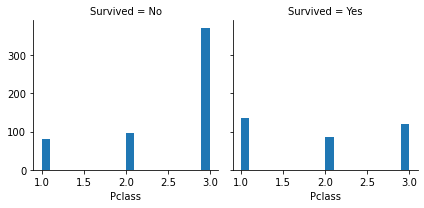

In [85]:
#classe
g=sns.FacetGrid(data,col="Survived")
g.map(plt.hist,"Pclass",bins=20)

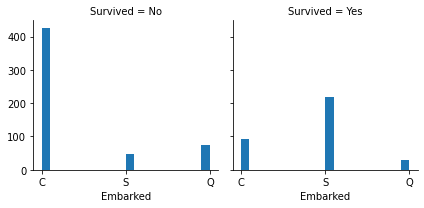

In [86]:
#Embarked
g=sns.FacetGrid(data,col="Survived")
g.map(plt.hist,"Embarked",bins=20)

In [87]:
def plot_correlation_map( df ):

    corr = df.corr()
  
    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax,  annot = True, annot_kws = { 'fontsize' : 12 } )

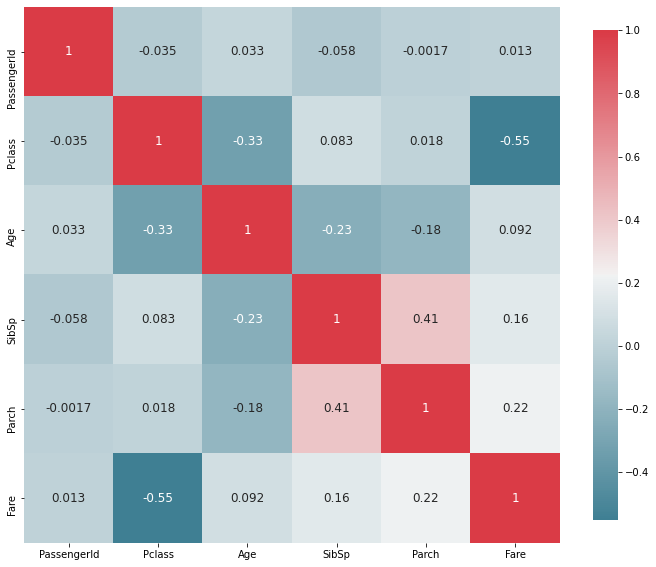

In [88]:
plot_correlation_map( data )

- we notice a negative correlation between Pclass and Fare : wich means that the more the Fare is higher the value of Pclass is lower. wich is logical because people who peyd more Fare travels in higher classes and people who peyd less Fare travels in lower classes.

- we also have a positive correlation between SibSP and Parch : wich means that the Number of siblings and spouses for a passnger aboard tend to go high if the Number of parents and children is high and vice versa (larger families have a higher SibSP and Parch and the oposite)

In [89]:
#Converting Survived to numerical 
cleanup_nums={ "Survived" : {"No":0,"Yes":1}}
data.replace(cleanup_nums,inplace=True)

In [90]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [91]:
#Converting Sex to numerical 
cleanup_nums={ "Sex" : {"female":0,"male":1}}
data.replace(cleanup_nums,inplace=True)

In [92]:
data["Sex"].value_counts()

1    577
0    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Pclass'>

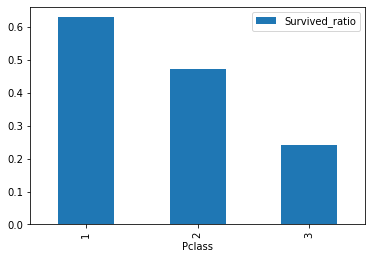

In [93]:
data.groupby(by="Pclass").agg(Survived_ratio=("Survived","mean")).plot(kind='bar')

We notice that 60% of passengers who traveld in first class have servived and 40% of passengers in second class and only 20 % of passengers in the third class managed to survive

In [94]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [95]:
data['title'] = data['Name'].str.split(',|\\.',expand = True)[1] 
data['title'] = data['title'].str.strip()
data['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Capt              1
Jonkheer          1
Sir               1
Mme               1
the Countess      1
Ms                1
Don               1
Lady              1
Name: title, dtype: int64

<AxesSubplot:xlabel='title'>

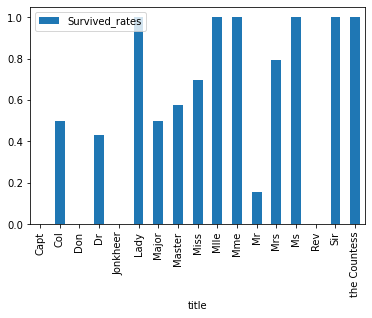

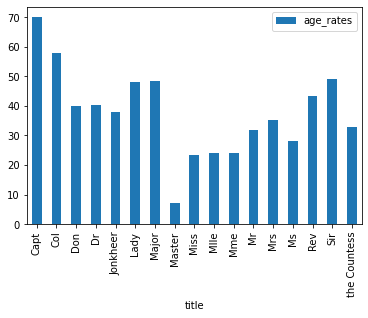

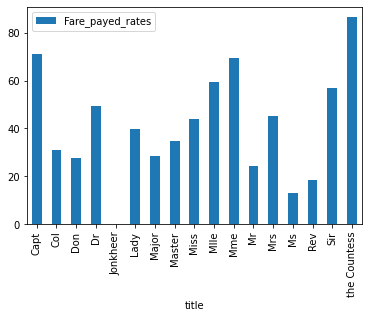

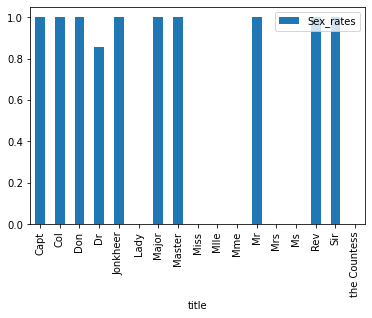

In [96]:
data.groupby(by="title").agg(Survived_rates=("Survived","mean")).plot(kind='bar') 
data.groupby(by="title").agg(age_rates=("Age","mean")).plot(kind='bar')   
data.groupby(by="title").agg(Fare_payed_rates=("Fare","mean")).plot(kind='bar')    
data.groupby(by="title").agg(Sex_rates=("Sex","mean")).plot(kind='bar')

In [97]:
data['title'] = data['Name'].str.split(',|\\.',expand = True)[1] 
data['title'] = data['title'].str.strip()
title_mapping = {"Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                      "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                   "Lady" :      "Royalty",
                  "the Countess": "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs",
                    "Master" :    "Master" }

data["title"] = data["title"].map(title_mapping)


<AxesSubplot:xlabel='title'>

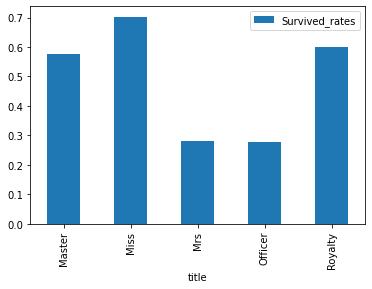

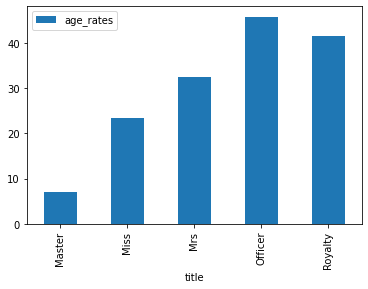

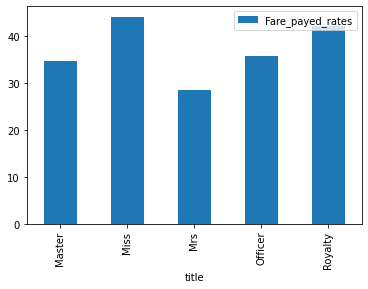

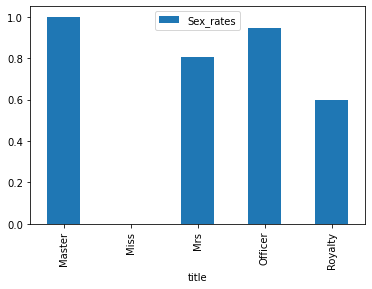

In [98]:
data.groupby(by="title").agg(Survived_rates=("Survived","mean")).plot(kind='bar')
data.groupby(by="title").agg(age_rates=("Age","mean")).plot(kind='bar')   
data.groupby(by="title").agg(Fare_payed_rates=("Fare","mean")).plot(kind='bar')    
data.groupby(by="title").agg(Sex_rates=("Sex","mean")).plot(kind='bar')

In [99]:
data["FamilySize"] = data["Parch"] + data["SibSp"]

<AxesSubplot:xlabel='FamilySize'>

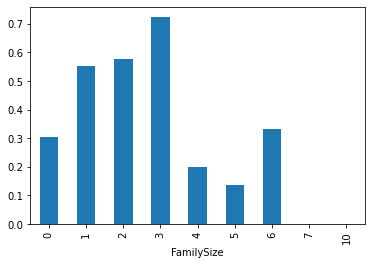

In [100]:
data['Survived'].groupby(data['FamilySize']).mean().plot(kind='bar')

FamilySize is a very important feature it looks like smaller families have a higher survival rate then larger families Perhaps because they needed to stay behind to look for each other or mabe they needed more time to move togather 

# logistic regression

In [101]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S,Mrs,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S,Mrs,0
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S,Mrs,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S,Mrs,4
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs,1


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = data[['Pclass','Age','Sex','Fare','FamilySize']]
y = data['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

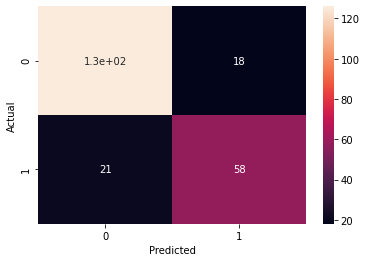

In [109]:
import pandas as pd
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       144
           1       0.76      0.73      0.75        79

    accuracy                           0.83       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.83      0.82       223

